## Collision Modeling Run Comparisons

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the data
df=pd.read_json('./data/gp_space_track_03MAR2022.json',orient='records')

In [3]:
# suppress all the entries that are not payload type
# suppress all the entries that not recent entries
df=df[(df['OBJECT_TYPE']=='PAYLOAD') & (df['EPOCH']>'2022-02-20T00:00:00')].copy(deep=True)
# creating the LEO slice
dfl=df[(df['SEMIMAJOR_AXIS']<=8415) & (df['SEMIMAJOR_AXIS']>=6600)].copy(deep=True)
# dfs will be our starlink frame
dfs=dfl[dfl['OBJECT_NAME'].str.contains('STARLINK')].copy(deep=True)
dfne=dfl[(dfl['SEMIMAJOR_AXIS']<=7200) & (~dfl['OBJECT_NAME'].str.contains('STARLINK'))].copy(deep=True)
dfne=dfne[~dfne['NORAD_CAT_ID'].isin([49044, 49269, 49379, 49407, 51660, 51712,48803, 49326, 49222])].copy(deep=True)
dfne.reset_index(drop=True,inplace=True)
ini_shape=dfne.shape[0]
dfs.reset_index(drop=True,inplace=True)
inis_shape=dfs.shape[0]
dfs.insert(0,'NEW_INDEX',list(range(ini_shape,ini_shape+inis_shape,1)))
dfs.set_index('NEW_INDEX',inplace=True)
dfri=pd.concat([dfne,dfs])

Mimicing the dataframes from the near earth LEO slice

In [4]:
dfri.shape

(4445, 40)

In [5]:
dfs.shape

(1918, 40)

In [6]:
dfne.shape

(2527, 40)

Checking shapes

In [7]:
dfo1=pd.read_csv('./data//close_leo_24hrs_MAR3GPDATA.csv')
dfo3=pd.read_csv('./data//close_leo_72hrs_MAR3GPDATA.csv')
dfo6=pd.read_csv('./data/close_leo_6days_MAR3GPDATA.csv')

In [8]:
dfo1['SAT_0_NAME'].unique().shape[0]/dfne.shape[0]

0.2631578947368421

In [9]:
dfo1.shape

(1049, 8)

In [10]:
dfo3['SAT_0_NAME'].unique().shape[0]/dfne.shape[0]

0.5033636723387416

In [11]:
dfo6['SAT_0_NAME'].unique().shape[0]/dfne.shape[0]

0.6640284922833399

In [12]:
dfo6.shape

(6309, 10)

As the simulation runs for a longer period of time, more close approaches occur.  This is not unexpected.

In [13]:
coll_rad=dfo6['SAT_0_NORAD'].unique().tolist()

In [14]:
dfne['CAD_6D']=dfne['NORAD_CAT_ID'].isin(coll_rad)

In [15]:
(dfne['CAD_6D']*1).sum()/(dfne.shape[0])

0.664424218440839

In [16]:
dfo6[(dfo6['SAT_1_NAME'].str.find('STARLINK'))>=0].shape[0]/dfo6.shape[0]

0.4038674908860358

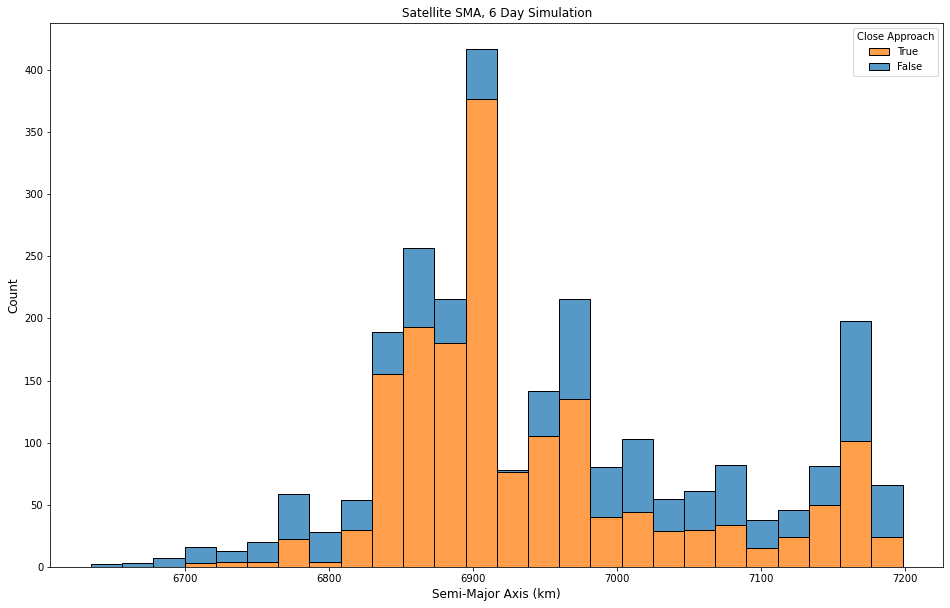

In [17]:
plt.figure(figsize=(16,10))
plt.title('Satellite SMA, 6 Day Simulation',size=12)
plt.xlabel('Semi-Major Axis (km)', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(data=dfne,x='SEMIMAJOR_AXIS',hue='CAD_6D',multiple='stack',legend=True);
plt.legend(title='Close Approach', loc='upper right', labels=['True', 'False']);
plt.savefig(fname='6_day_hist.png')

Given that more close approaches occur the longer the simulation runs, this would mean for long term studies it might be more inline to generalize the appraoch as opposed to looking at which satellites have risks of collision.